In [2]:
%matplotlib notebook
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

import sys
sys.path.append("../kai_colloids/PyDDM") #must point to the PyDDM folder
import ddm_analysis_and_fitting as ddm

import tiff_file
import ddm_clean 

import io 
import sys
import csv
import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data

## Image autocorrelation function defined below

In [3]:
def im_corr(im, filter=False, filtersize=80, bin=True, binsize=2):
    '''
    Computes image autocorrelation. 
    Takes as input:
        image: 2D image
        filter: Boolean, if true will filter image with uniform filter
        filtersize: size for uniform filtering
        
    Returns:
        corr_im: the image autocorrelation (this will be same size as image)
        rav_corr: radially averaged image autocorrelation
    '''
    # Crop image
    image = im[:1400, :1400]
        
    if bin:
        from skimage.transform import downscale_local_mean #For binning
        image = downscale_local_mean(image, (binsize,binsize), cval=1)
        
    if filter:
        image = image*1.0 - uf(image,filtersize)
    image = 1.0*image-image.mean() #subtract mean
    image = image/image.std() #normalize by standard deviation
    corr_im = abs(fftshift(ifft2(fft2(image)*np.conj(fft2(image)))))/(image.shape[0]*image.shape[1])
    
    #radial average taken
    rav_corr = ddm_clean.newRadav(corr_im)
    
    
    return corr_im, rav_corr

def filtimage(image, filtersize=80):
    image = image*1.0 - uf(image,filtersize)
    return image

def last_3chars(x):
    return((x.split('\\')[-1])[-7:-4])
#last_3chars(files[0])

###define function to find characteristic correlation lengths of SIA curves 
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

one_over_e = 1.0/np.exp(1) #characteristic decay length 1/e = 0.36787944117144233... 
#print(one_over_e)

In [ ]:
        new_fit_lim = fit_lim - 20
        br_popt, br_pcov = curve_fit(single_exponential, all_xvalues[0:new_fit_lim], br_y_array[0:new_fit_lim])
        print(time+"-- "+'fit: As=%5.3f, l=%5.3f' % tuple(br_popt))
        br_fit_values = single_exponential(x_fit_values, *br_popt)
        
        
j=1
if (br_A < 0.1) or (br_B < 0.1):
    try_again = True
    while try_again:
        print("poor fit at "+ time)
        new_fit_lim = fit_lim - 2*j
        br_popt, br_pcov = curve_fit(double_exponential, all_xvalues[0:new_fit_lim], br_y_array[0:new_fit_lim])
        print(time+"-- "+'fit: A=%5.3f, B=%5.3f, l1=%5.3f, l2=%5.3f' % tuple(br_popt))
        br_A, br_B, br_l1, br_l2 = tuple(br_popt)
        if (br_A < 0.1) or (br_B < 0.1):
            try_again = True
            j = j+1
        else:
            try_again = False

            
    if (br_A < 0.1) or (br_B < 0.1):
        print("poor fit at "+ time)
        new_fit_lim = fit_lim - 20
        br_popt, br_pcov = curve_fit(double_exponential, all_xvalues[0:new_fit_lim], br_y_array[0:new_fit_lim])
        print(time+"-- "+'fit: A=%5.3f, B=%5.3f, l1=%5.3f, l2=%5.3f' % tuple(br_popt))
        br_A, br_B, br_l1, br_l2 = tuple(br_popt)
        br_fit_values = double_exponential(x_fit_values, *br_popt)
        if (br_A < 0.1) or (br_B < 0.1):
            print("poor fit at "+ time)
            new_fit_lim = fit_lim - 40
            br_popt, br_pcov = curve_fit(double_exponential, all_xvalues[0:new_fit_lim], br_y_array[0:new_fit_lim])
            print(time+"-- "+'fit: A=%5.3f, B=%5.3f, l1=%5.3f, l2=%5.3f' % tuple(br_popt))
            br_fit_values = double_exponential(x_fit_values, *br_popt)
    else:
        br_fit_values = double_exponential(x_fit_values, *br_popt)
        
        
        if j == 6:
                print("poor fit at "+ time + " can't be fixed :(")
                try_again = False
                x_fit_lim = all_xvalues[fit_lim]
                br_popt, br_pcov = curve_fit(double_exponential, all_xvalues[0:fit_lim], br_y_array[0:fit_lim])
                print(time+"-- "+'fit: A=%5.3f, B=%5.3f, l1=%5.3f, l2=%5.3f' % tuple(br_popt))
                br_A, br_B, br_l1, br_l2 = tuple(br_popt)
                x_fit_values = np.linspace(0.364, all_xvalues[fit_lim], 1000)
                
                
    j=1
    if (br_A < 0.1) or (br_B < 0.1):
        try_again = True
        while try_again:
            print("     poor fit at "+ time)
            new_fit_lim = fit_lim - 2*j
            x_fit_lim = all_xvalues[new_fit_lim]
            br_popt, br_pcov = curve_fit(double_exponential, all_xvalues[0:new_fit_lim], br_y_array[0:new_fit_lim])
            #print(time+"-- xlim= "+str(x_fit_lim)+', fit: A=%5.3f, B=%5.3f, l1=%5.3f, l2=%5.3f' % tuple(br_popt))
            br_A, br_B, br_l1, br_l2 = tuple(br_popt)
            x_fit_values = np.linspace(0.364, all_xvalues[new_fit_lim], 1000)
            if j == 6:
                print("poor fit at "+ time + " can't be fixed :(")
                try_again = False
                x_fit_lim = all_xvalues[fit_lim]
                x_fit_values = np.linspace(0.364, all_xvalues[fit_lim], 1000)
                br_A, br_B, br_l1, br_l2 =  0, 0, 0, 0
            elif (br_A < 0.1) or (br_B < 0.1):
                try_again = True
                j = j+1
            else:
                try_again = False
                print("    yay!! good fit at "+time)
                print(time+"-- xlim= "+str(x_fit_lim)+', fit: A=%5.3f, B=%5.3f, l1=%5.3f, l2=%5.3f' % tuple(br_popt))

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 6
from scipy.optimize import curve_fit
def double_exponential(x, A, B, l1, l2):
    return (A*np.exp(-x/l1)) + (B*np.exp(-x/l2))

def single_exponential(x, As, l):
    return (As*np.exp(-x/l1)) 

popt, pcov = curve_fit(double_exponential, all_xvalues, br_corr_rad_array[0])
A_val = popt[0]
print(np.array(br_popt))
A,B,l1,l2 = tuple(br_popt)
print(A,B,l1,l2)
plt.plot(all_xvalues, double_exponential(all_xvalues, *popt), 'r.',
         label='fit: A=%5.3f, B=%5.3f, l1=%5.3f, l2=%5.3f' % tuple(popt))
plt.plot(all_xvalues, br_corr_rad_array[0],'.',ms=markerSize)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
###################################################################################
# Specify where the data is and file name for image (or image sequence)           #
###################################################################################

directory = "Z"
exp = "8-15-22_s1_EA,WT,1-3WT"
data_dir = directory+":\\Gregor L\\__Kai Colloids\\"+exp+"\\all tiff files\\" 
data_dir2 = directory+":\\Gregor L\\__Kai Colloids\\"+exp+"\\reordered tiffs\\" #bottom_row_t01\\
plot_saveto= directory+":\\Gregor L\\__Kai Colloids\\SIA\\Data\\"+exp+"\\"

files = glob.glob(data_dir+"*.tif")
#files = sorted(files, key = last_3chars)
print("found %i files" % len(files))
print(int((len(files))/3))
for i,f in enumerate(files): print (' %i \t %s' % (i, f.split('\\')[-1]))

found 27 files
9
 0 	 bottom_row_t1.tif
 1 	 bottom_row_t2.tif
 2 	 bottom_row_t3.tif
 3 	 bottom_row_t4.tif
 4 	 bottom_row_t5.tif
 5 	 bottom_row_t6.tif
 6 	 bottom_row_t7.tif
 7 	 bottom_row_t8.tif
 8 	 bottom_row_t9.tif
 9 	 middle_row_t1.tif
 10 	 middle_row_t2.tif
 11 	 middle_row_t3.tif
 12 	 middle_row_t4.tif
 13 	 middle_row_t5.tif
 14 	 middle_row_t6.tif
 15 	 middle_row_t7.tif
 16 	 middle_row_t8.tif
 17 	 middle_row_t9.tif
 18 	 top_row_t1.tif
 19 	 top_row_t2.tif
 20 	 top_row_t3.tif
 21 	 top_row_t4.tif
 22 	 top_row_t5.tif
 23 	 top_row_t6.tif
 24 	 top_row_t7.tif
 25 	 top_row_t8.tif
 26 	 top_row_t9.tif


In [11]:
############################################################################################
# specify each condition (frame_names) and the time points of data collection (time_array) #
############################################################################################
frame_names = ["1-3_kA-WT", "WT-nokA", "EA KaiC", "AE KaiC"]
time_array = [0.5, 3.2, 17.75, 20, 22, 24.25, 26, 41.75, 44]    #[0.5, 3.5, 6.5, 9.3, 12.1, 15, 18, 21, 24.5, 27.3, 40.5, 44.3]
fig_size = 10,10/1.618
font_size = 16
dpi_num = 800

print((files[0]))
eg_im= tiff_file.imread(files[0])
print(eg_im.shape)
frames_per_tiff = int(eg_im.shape[0])
print(frames_per_tiff)
arr_length = int((len(files))/3)
print(arr_length)

Z:\Gregor L\__Kai Colloids\8-15-22_s1_EA,WT,1-3WT\all tiff files\bottom_row_t1.tif
(5, 1440, 1920)
5
9


###################################################################################################
# makes new tiff files, each new tiff has all consecutive time points for each specific condition #
###################################################################################################
arr_length = int((len(files))/3)

for j in range(frames_per_tiff-1):
    frame_num = str(j+1)

    for i in range(arr_length):    
        br_frame1_im = tiff_file.imread(files[i],key=[j])
        mr_frame1_im = tiff_file.imread(files[i+arr_length],key=[j])
        tr_frame1_im = tiff_file.imread(files[i+(arr_length*2)],key=[j])
        #print(br_frame1_im.shape[0])
        if i==0:
            br_frame1 = np.zeros((arr_length, br_frame1_im.shape[0], br_frame1_im.shape[1]), dtype=np.uint16)
            mr_frame1 = np.zeros((arr_length, br_frame1_im.shape[0], br_frame1_im.shape[1]), dtype=np.uint16)
            tr_frame1 = np.zeros((arr_length, br_frame1_im.shape[0], br_frame1_im.shape[1]), dtype=np.uint16)
        br_frame1[i] = br_frame1_im
        mr_frame1[i] = mr_frame1_im
        tr_frame1[i] = tr_frame1_im

    tiff_file.imsave(data_dir2 +'br_'+frame_names[j]+'.tif', br_frame1)
    tiff_file.imsave(data_dir2 +'mr_'+frame_names[j]+'.tif', mr_frame1)
    tiff_file.imsave(data_dir2 +'tr_'+frame_names[j]+'.tif', tr_frame1)
    print(tr_frame1.shape)

#####################################################
# **optional** preview of tiff files to be analyzed #
#####################################################
br_frame1 = tiff_file.imread(data_dir2 +'tr_'+frame_names[0]+'.tif')

plt.figure(figsize=(10,10))    
for i in range (arr_length):
    ax = plt.subplot(4,3,i+1) ##change according to number of frames (6 --> 3,3; 12 --> 4,4)
    ax.set_title("frame %i" % int(i + 1), fontsize=10)
    ax.matshow(br_frame1[i], cmap = 'bone') #fig.set_cmap('hot') 
    plt.axis('off')
    plt.tight_layout(pad=.25)

In [7]:
im_array = [0.0] * int(len(files))
br_corr_im_array = [0.0] * int(len(files))
br_corr_rad_array = [0.0] * int(len(files))
mr_corr_im_array = [0.0] * int(len(files))
mr_corr_rad_array = [0.0] * int(len(files))
tr_corr_im_array = [0.0] * int(len(files))
tr_corr_rad_array = [0.0] * int(len(files))

all_xvalues = [0.0] * int(len(files))

<IPython.core.display.Javascript object>


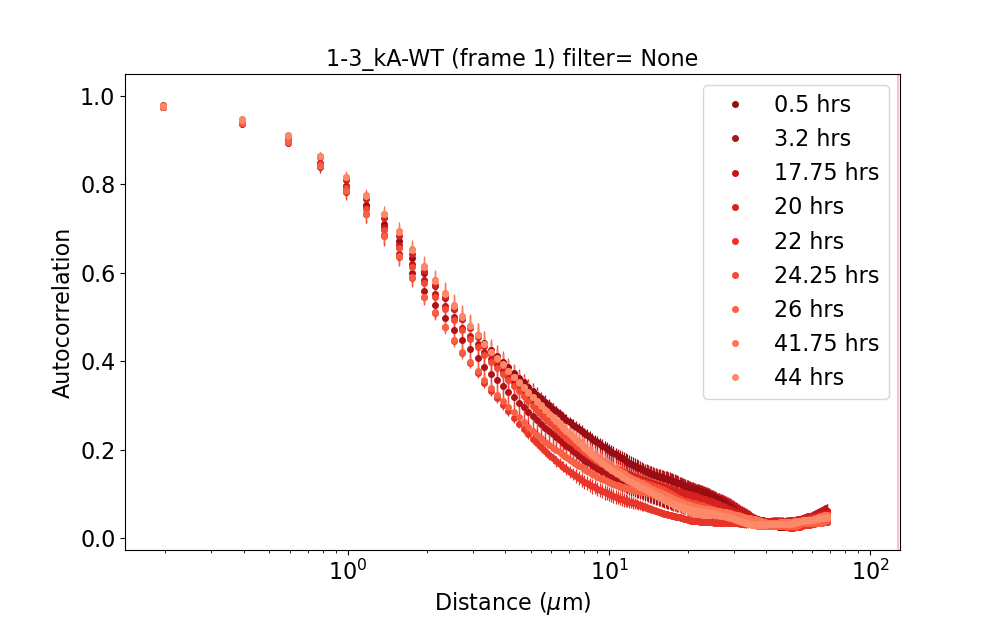

Text(0.5, 1.0, '1-3_kA-WT (frame 1) filter= None')

In [8]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 8

t_f = False  #use filter? (True = yes, False = no)
size = 0  #set filter size, recommendation = 200

key = 0
cmap_num = (arr_length*2) - 2
mean_corr_rad_array  = [0.0] * int(len(files))
std_error_array = [0.0] * int(len(files))

for i in range(arr_length):    
    frame_num = "frame %i" % int(key +1) 
    full_filename = files[i]
    data_file = str(time_array[i]) + " hrs" #"time "+ (full_filename.split('\\')[-1])[12:-4]
    br_corr_im_array[i], br_corr_rad_array[i] = im_corr(tiff_file.imread(files[i],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    mr_corr_im_array[i], mr_corr_rad_array[i] = im_corr(tiff_file.imread(files[i+arr_length],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    tr_corr_im_array[i], tr_corr_rad_array[i] = im_corr(tiff_file.imread(files[i+(arr_length*2)],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    
    all_ims = np.zeros((3,len(br_corr_rad_array[i])))
    all_ims[0] = br_corr_rad_array[i]
    all_ims[1] = mr_corr_rad_array[i]
    all_ims[2] = tr_corr_rad_array[i]
    
    mean_corr_rad_array[i] = all_ims.mean(axis=0)
    std_error_array[i] = (all_ims.std(axis=0))/np.sqrt(3)
    
    xvalues = np.arange(len(br_corr_rad_array[0]))*0.196
    all_xvalues = xvalues

    plt.semilogx(xvalues, mean_corr_rad_array[i],'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=data_file)
    
    ax.errorbar(xvalues, mean_corr_rad_array[i], std_error_array[i], fmt = 'none', elinewidth=0.9, c=cmap(0.9-(i/cmap_num)))
    ax.set_xscale("log")
    
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
ax.legend(loc=0,fontsize=font_size)
    #####
plt.axvline(x=127.4, color='pink', linestyle='-', label='ROI size')
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 130) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
    #####
plt.title(title, fontsize=font_size)
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [59]:
###save figure 
fig.savefig(plot_saveto+"SIA with error for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


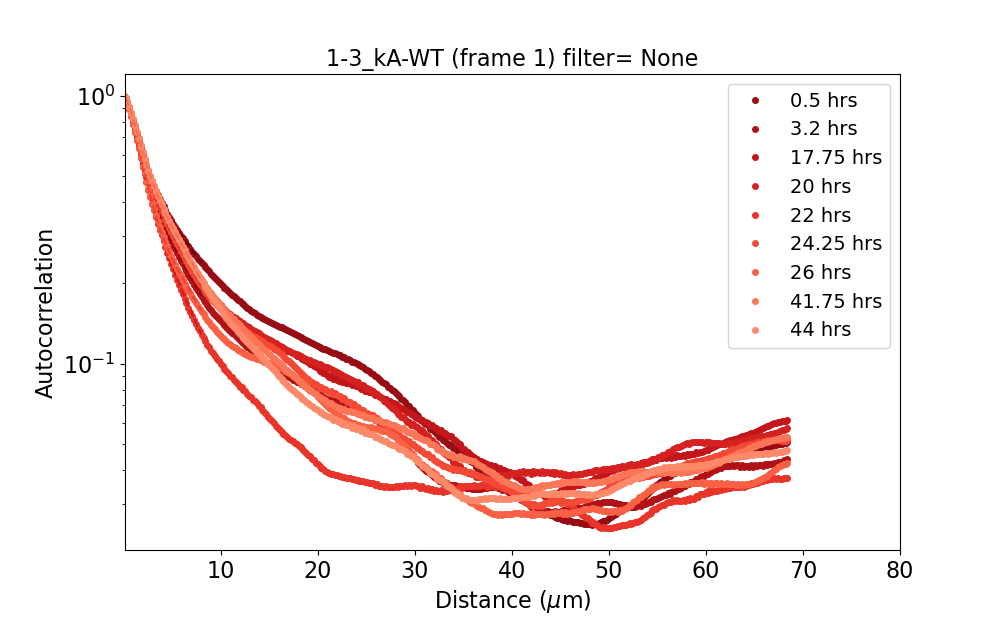

In [50]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 8

frame1_results_dict = {}
frame1_results_dict["time array"] = time_array
corr_length_array = [0.0] * arr_length

for i in range(arr_length):     
    full_filename = files[i]
    time = str(time_array[i]) + " hrs" #"time "+(full_filename.split('\\')[-1])[12:-4]
    y_array =  mean_corr_rad_array[i]
    plt.semilogy(all_xvalues,y_array,'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=time)
    
    ###this section does an 18 degree polynomial fit of the SIA data (corr_rad_array) for each frame
    fit_lim = -50 #set to -1 to fit over whole range of SIA, adjust as needed (maybe avoid fitting noisy data at edge of range)
    fit_line = np.poly1d(np.polyfit(all_xvalues[:fit_lim], y_array[:fit_lim], 17))
    x_fit_values = np.linspace(0.19, 8, 1000)
    a = fit_line(x_fit_values)
    plt.semilogy(x_fit_values, a,'--',c=cmap(0.99-(i/cmap_num)))
    
    ### find the x-value corresponding to the fit line y-value nearest to 1/e
    nearest = find_nearest(a, one_over_e)
    index, = np.where(a == nearest)
    corr_length = float(x_fit_values[index])
    
    ###saving all data & results to results dictionary 
    frame1_results_dict[time] = {} #creates sub dictionary (within results_dict) for each frame analyzed 
    frame1_results_dict[time]["x vals"] = all_xvalues
    frame1_results_dict[time]["y vals"] = y_array
    frame1_results_dict[time]["y error"] = std_error_array[i]
    frame1_results_dict[time]["x fit vals"] = x_fit_values
    frame1_results_dict[time]["y fit vals"] = a
    frame1_results_dict[time]["corr length"] = corr_length
    corr_length_array[i] = corr_length
    
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
#plt.axhline(y=one_over_e, color='r', linestyle='-', label='1/e')
    #####
ax.legend(loc=0,fontsize=(font_size-2))
plt.axvline(x=127.4, color='pink', linestyle='-', label='ROI size')
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 80) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
plt.title(title, fontsize=font_size)
    #####
###save dictionary results 
file_to_write = open(plot_saveto+ "SIA results for "+title+".p", "wb")
pickle.dump(frame1_results_dict, file_to_write)

In [61]:
###save figure 
fig.savefig(plot_saveto+"SIA fits for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


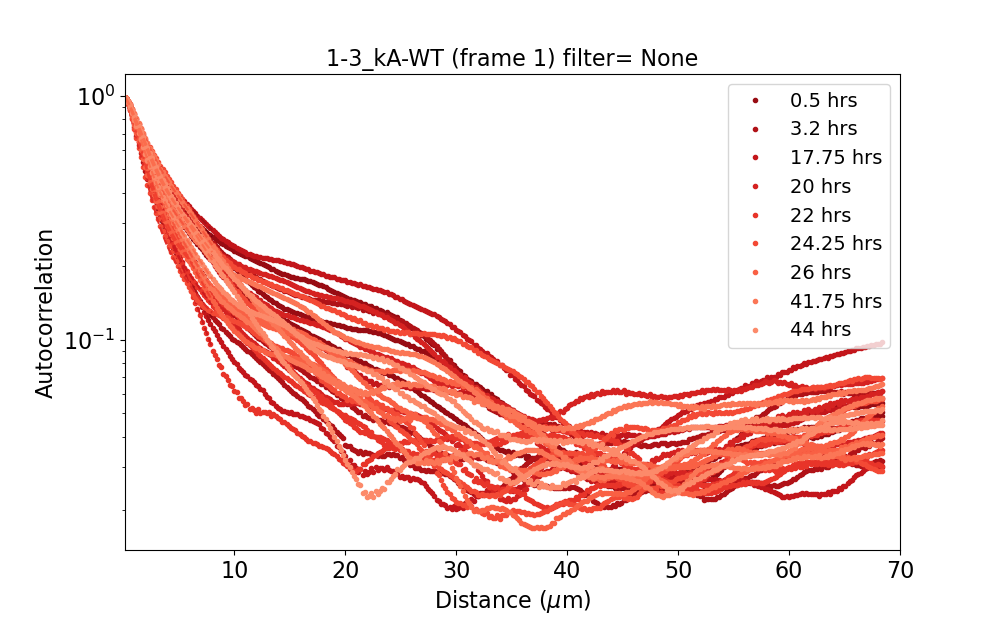

[4.474164164164165, 2.7933333333333334, 4.2630830830830835, 3.246766766766767, 2.9340540540540543, 2.597887887887888, 2.941871871871872, 3.5594794794794797, 3.7080180180180182]


Text(0.5, 1.0, '1-3_kA-WT (frame 1) filter= None')

In [27]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 6

frame1_results_dict = {}
frame1_results_dict["time array"] = time_array
br_corr_length_array = [0.0] * arr_length
mr_corr_length_array = [0.0] * arr_length
tr_corr_length_array = [0.0] * arr_length

for i in range(arr_length):     
    full_filename = files[i]
    time = str(time_array[i]) + " hrs" #"time "+(full_filename.split('\\')[-1])[12:-4]
    #y_array =  mean_corr_rad_array[i]
    br_y_array = br_corr_rad_array[i]
    mr_y_array = mr_corr_rad_array[i]
    tr_y_array = tr_corr_rad_array[i]
    plt.semilogy(all_xvalues,br_y_array,'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=time)
    plt.semilogy(all_xvalues,mr_y_array,'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)))
    plt.semilogy(all_xvalues,tr_y_array,'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)))
    
    ###this section does an 18 degree polynomial fit of the SIA data (corr_rad_array) for each frame
    fit_lim = -50 #set to -1 to fit over whole range of SIA, adjust as needed (maybe avoid fitting noisy data at edge of range)
    br_fit = np.poly1d(np.polyfit(all_xvalues[:fit_lim], br_y_array[:fit_lim], 17))
    mr_fit = np.poly1d(np.polyfit(all_xvalues[:fit_lim], mr_y_array[:fit_lim], 17))
    tr_fit = np.poly1d(np.polyfit(all_xvalues[:fit_lim], tr_y_array[:fit_lim], 17))
    x_fit_values = np.linspace(0.19, 8, 1000)
    br_fit_values = br_fit(x_fit_values)
    mr_fit_values = mr_fit(x_fit_values)
    tr_fit_values = tr_fit(x_fit_values)
    plt.semilogy(x_fit_values, br_fit_values,'--',c=cmap(0.99-(i/cmap_num)))
    plt.semilogy(x_fit_values, mr_fit_values,'--',c=cmap(0.99-(i/cmap_num)))
    plt.semilogy(x_fit_values, tr_fit_values,'--',c=cmap(0.99-(i/cmap_num)))
    
    ### find the x-value corresponding to the fit line y-value nearest to 1/e
    br_nearest = find_nearest(br_fit_values, one_over_e)
    br_corr_length = float(x_fit_values[np.where(br_fit_values == br_nearest)])
    
    mr_nearest = find_nearest(mr_fit_values, one_over_e)
    mr_corr_length = float(x_fit_values[np.where(mr_fit_values == mr_nearest)])
    
    tr_nearest = find_nearest(tr_fit_values, one_over_e)
    tr_corr_length = float(x_fit_values[np.where(tr_fit_values == tr_nearest)])
    
    br_corr_length_array[i] = br_corr_length
    mr_corr_length_array[i] = mr_corr_length
    tr_corr_length_array[i] = tr_corr_length
    
    

    
print(br_corr_length_array)
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
#plt.axhline(y=one_over_e, color='r', linestyle='-', label='1/e')
    #####
ax.legend(loc=0,fontsize=(font_size-2))
plt.axvline(x=127.4, color='pink', linestyle='-', label='ROI size')
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 70) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
plt.title(title, fontsize=font_size)

In [ ]:
###save figure 
fig.savefig(plot_saveto+"loglog SIA for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


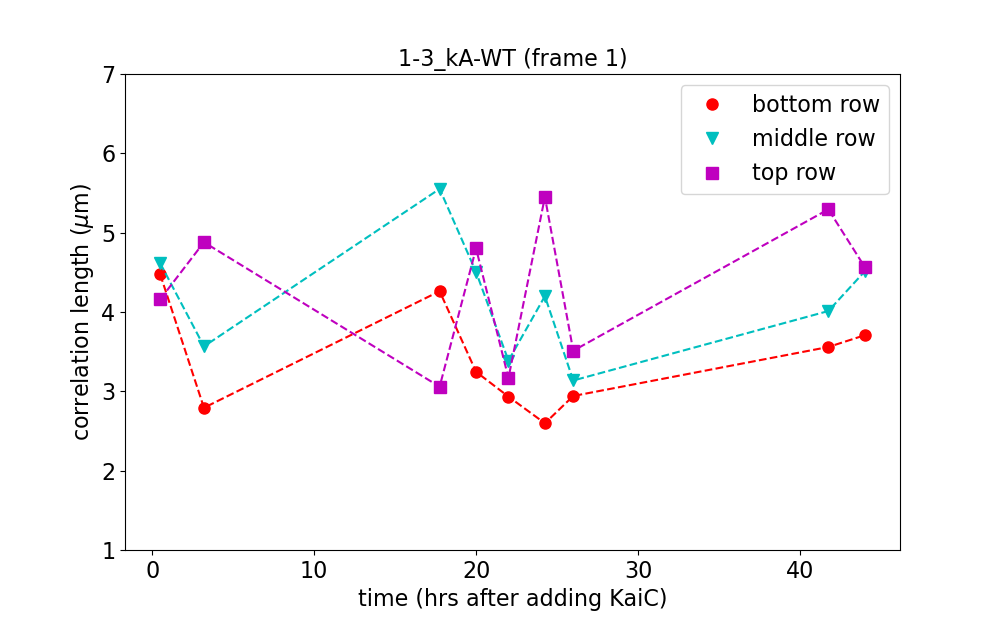

[0.5, 3.2, 17.75, 20, 22, 24.25, 26, 41.75, 44]


In [34]:
###set figure parameters 
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 8

###label each point 
'''
time_array = [0] * arr_length
for i in range(arr_length):
    time_array[i] = int(i+1)
'''
#time_array = [0.5, 4.5, 8, 12, 20, 24]
print(time_array)
    
plt.plot(time_array, br_corr_length_array,'ro', ms=markerSize, label='bottom row')
plt.plot(time_array, br_corr_length_array, 'r--',ms=(markerSize-3))

plt.plot(time_array, mr_corr_length_array,'cv', ms=markerSize, label='middle row')
plt.plot(time_array, mr_corr_length_array,'c--',ms=(markerSize-3))

plt.plot(time_array, tr_corr_length_array,'ms', ms=markerSize, label='top row')
plt.plot(time_array, tr_corr_length_array,'m--',ms=(markerSize-3))

plt.xlabel("time (hrs after adding KaiC)",fontsize=font_size)
plt.ylabel("correlation length ($\mu$m)",fontsize=font_size)
plt.ylim(1,7)
title = frame_names[key] + ' (' + frame_num + ')'
plt.title(title, fontsize=font_size)
ax.legend(loc=0,fontsize=(font_size))

<IPython.core.display.Javascript object>


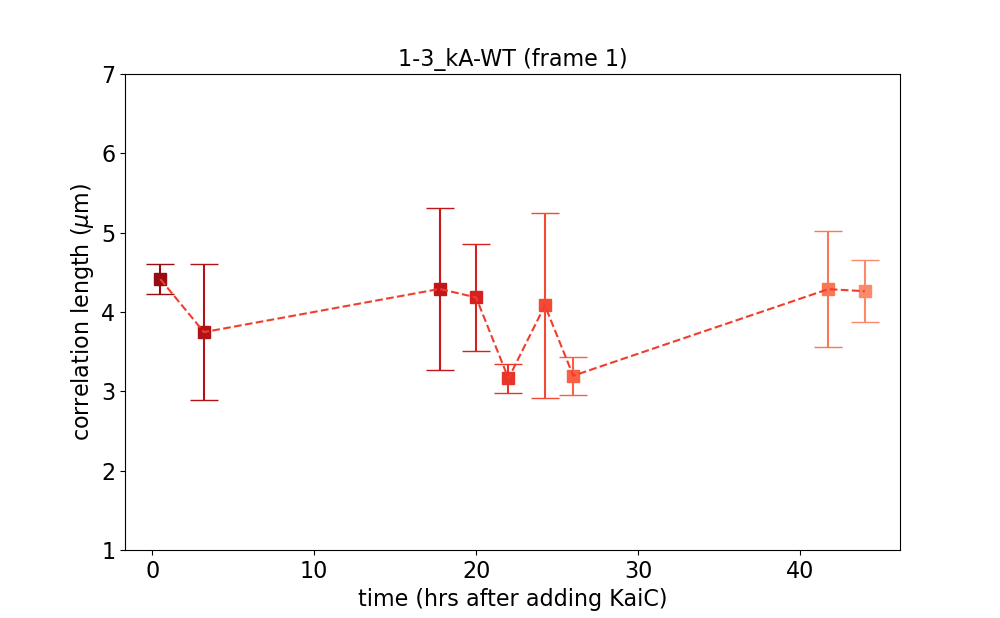

Text(0.5, 1.0, '1-3_kA-WT (frame 1)')

In [51]:
###set figure parameters 
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 8

cmap = matplotlib.cm.get_cmap('Reds')

all_corr_lengths = np.zeros((3,len(br_corr_length_array)))
all_corr_lengths[0] = br_corr_length_array
all_corr_lengths[1] = mr_corr_length_array
all_corr_lengths[2] = tr_corr_length_array

mean_corr_length_array = all_corr_lengths.mean(axis=0)
cl_std_dev_array = (all_corr_lengths.std(axis=0))   #/np.sqrt(3)

for i in range(int(len(time_array))):
    plt.plot(time_array[i], mean_corr_length_array[i],'s', ms=markerSize, c=cmap(0.9-(i/cmap_num)))
    ax.errorbar(time_array[i], mean_corr_length_array[i], cl_std_dev_array[i], fmt = 'none', ecolor=cmap(0.9-(i/cmap_num)), capsize=10)
num = (int(len(time_array)))/2
plt.plot(time_array, mean_corr_length_array,'--',ms=(markerSize-3), c=cmap(0.9-(num/cmap_num)))

plt.xlabel("time (hrs after adding KaiC)",fontsize=font_size)
plt.ylabel("correlation length ($\mu$m)",fontsize=font_size)
plt.ylim(1,7)
title = frame_names[key] + ' (' + frame_num + ')'
plt.title(title, fontsize=font_size)
#ax.legend(loc=0,fontsize=(font_size))

<IPython.core.display.Javascript object>


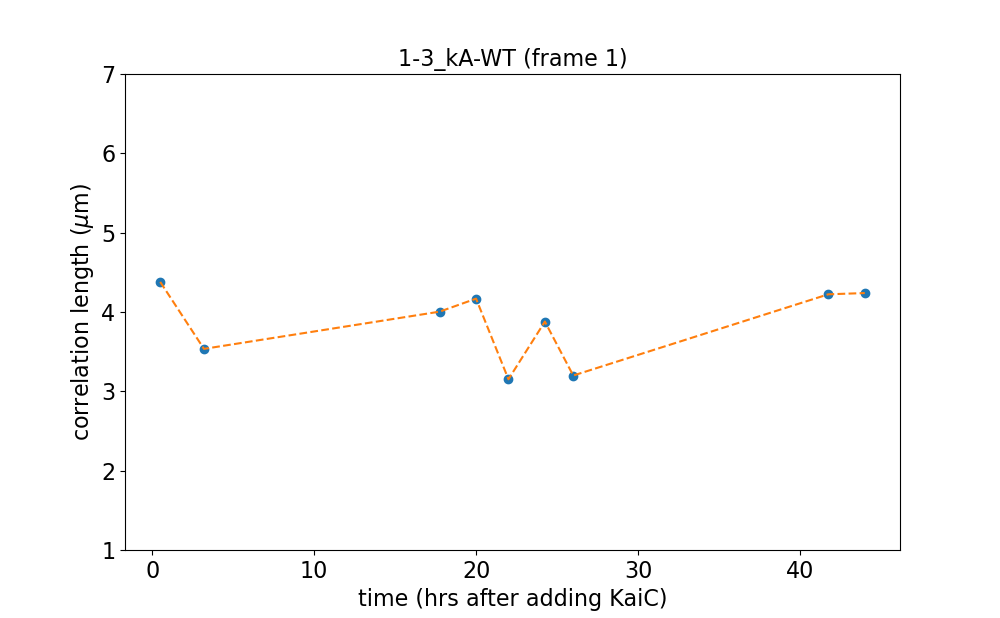

[0.5, 3.2, 17.75, 20, 22, 24.25, 26, 41.75, 44]


Text(0.5, 1.0, '1-3_kA-WT (frame 1)')

In [63]:
###set figure parameters 
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

###label each point 
'''
time_array = [0] * arr_length
for i in range(arr_length):
    time_array[i] = int(i+1)
'''
#time_array = [0.5, 4.5, 8, 12, 20, 24]
print(time_array)
    
plt.plot(time_array, corr_length_array,'o')
plt.plot(time_array, corr_length_array,'--')
plt.xlabel("time (hrs after adding KaiC)",fontsize=font_size)
plt.ylabel("correlation length ($\mu$m)",fontsize=font_size)
plt.ylim(1,7)
title = frame_names[key] + ' (' + frame_num + ')'
plt.title(title, fontsize=font_size)

In [64]:
###save figure 
fig.savefig(plot_saveto+"correlation length vs time for "+title+".jpg", dpi=dpi_num)

In [65]:
#print(results_dict)

<IPython.core.display.Javascript object>


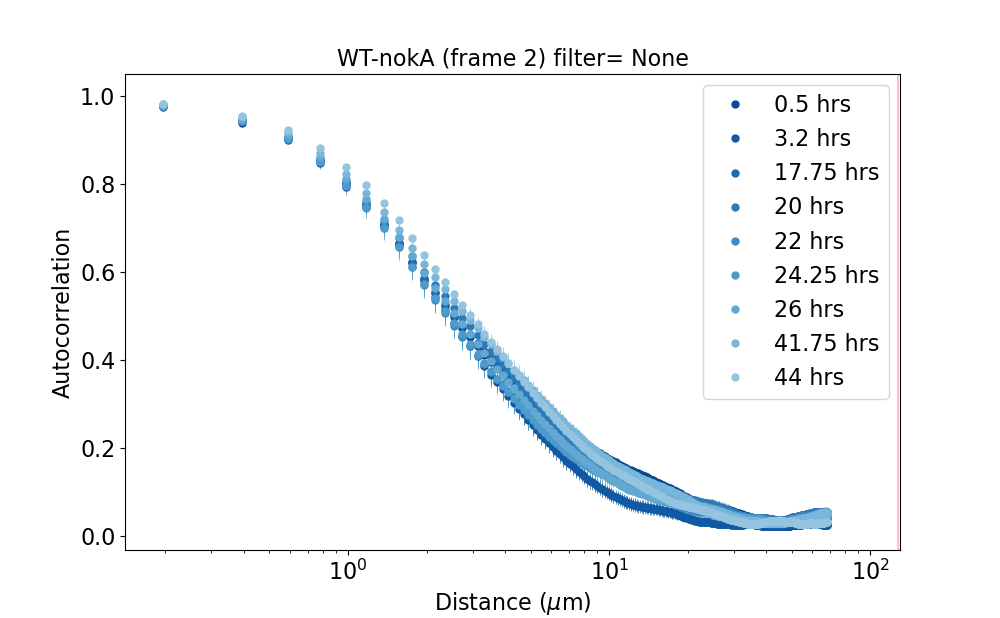

Text(0.5, 1.0, 'WT-nokA (frame 2) filter= None')

In [66]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Blues')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

key = 1
mean_corr_rad_array  = [0.0] * int(len(files))
std_error_array = [0.0] * int(len(files))

for i in range(arr_length):    
    frame_num = "frame %i" % int(key +1) 
    full_filename = files[i]
    data_file = str(time_array[i]) + " hrs"  #"time "+(full_filename.split('\\')[-1])[12:-4]
    br_corr_im_array[i], br_corr_rad_array[i] = im_corr(tiff_file.imread(files[i],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    mr_corr_im_array[i], mr_corr_rad_array[i] = im_corr(tiff_file.imread(files[i+arr_length],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    tr_corr_im_array[i], tr_corr_rad_array[i] = im_corr(tiff_file.imread(files[i+(arr_length*2)],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    
    all_ims = np.zeros((3,len(br_corr_rad_array[i])))
    all_ims[0] = br_corr_rad_array[i]
    all_ims[1] = mr_corr_rad_array[i]
    all_ims[2] = tr_corr_rad_array[i]
    
    mean_corr_rad_array[i] = all_ims.mean(axis=0)
    std_error_array[i] = (all_ims.std(axis=0))/np.sqrt(3)
    
    xvalues = np.arange(len(br_corr_rad_array[0]))*0.196
    all_xvalues = xvalues

    plt.semilogx(xvalues, mean_corr_rad_array[i],'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=data_file)
    
    ax.errorbar(xvalues, mean_corr_rad_array[i], std_error_array[i], fmt = 'none', elinewidth=0.5, c=cmap(0.9-(i/cmap_num)))
    ax.set_xscale("log")
    
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
ax.legend(loc=0, fontsize=font_size)
    #####
plt.axvline(x=127.4, color='pink', linestyle='-', label='ROI size')
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 130) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
    #####
plt.title(title, fontsize=font_size)
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [67]:
###save figure 
fig.savefig(plot_saveto+"SIA with error for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


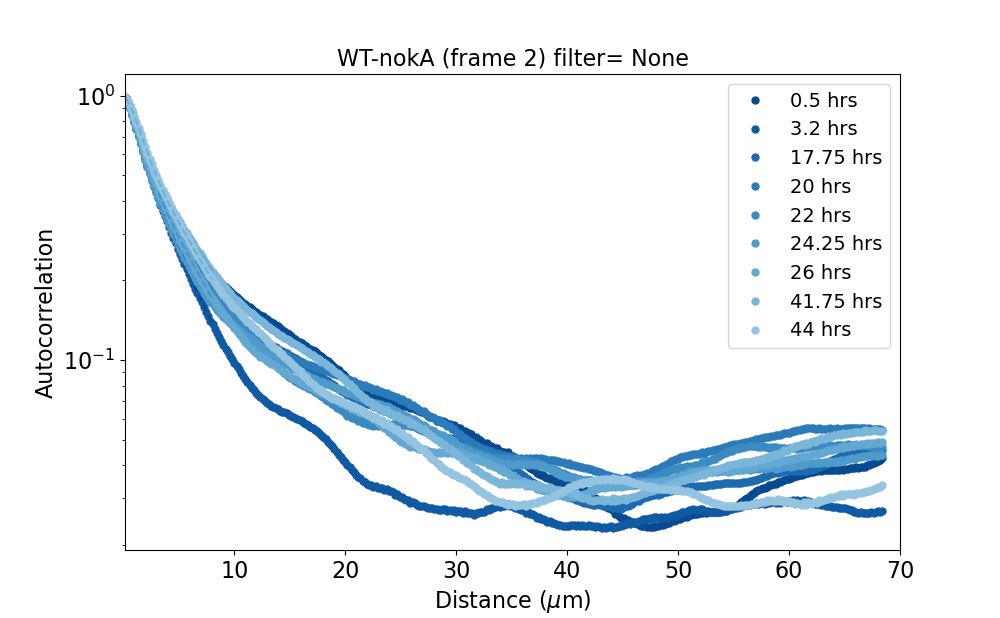

In [68]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Blues')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

frame2_results_dict = {}
frame2_results_dict["time array"] = time_array
corr_length_array = [0.0] * arr_length

for i in range(arr_length):     
    full_filename = files[i]
    time = str(time_array[i]) + " hrs" #"time "+(full_filename.split('\\')[-1])[12:-4]
    y_array =  mean_corr_rad_array[i]
    plt.semilogy(all_xvalues,y_array,'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=time)
    #plt.plot(all_xvalues,y_array,'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=time)
    
    ###this section does an 18 degree polynomial fit of the SIA data (corr_rad_array) for each frame
    fit_lim = -50 #set to -1 to fit over whole range of SIA, adjust as needed (maybe avoid fitting noisy data at edge of range)
    fit_line = np.poly1d(np.polyfit(all_xvalues[:fit_lim], y_array[:fit_lim], 17))
    x_fit_values = np.linspace(0.19, 8, 1000)
    a = fit_line(x_fit_values)
    plt.semilogy(x_fit_values, a,'--',c=cmap(0.99-(i/cmap_num)))
    #plt.plot(x_fit_values, a,'--',c=cmap(0.99-(i/cmap_num)))
    
    ### find the x-value corresponding to the fit line y-value nearest to 1/e
    nearest = find_nearest(a, one_over_e)
    index, = np.where(a == nearest)
    corr_length = float(x_fit_values[index])
    
    ###saving all data & results to results dictionary 
    frame2_results_dict[time] = {} #creates sub dictionary (within results_dict) for each frame analyzed 
    frame2_results_dict[time]["x vals"] = all_xvalues
    frame2_results_dict[time]["y vals"] = y_array
    frame2_results_dict[time]["y error"] = std_error_array[i]
    frame2_results_dict[time]["x fit vals"] = x_fit_values
    frame2_results_dict[time]["y fit vals"] = a
    frame2_results_dict[time]["corr length"] = corr_length
    corr_length_array[i] = corr_length
    
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
#plt.axhline(y=one_over_e, color='r', linestyle='-', label='1/e')

    #####
ax.legend(loc=0,fontsize=(font_size-2))
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 70) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
plt.title(title, fontsize=font_size)
    #####

###save dictionary results 
file_to_write = open(plot_saveto+ "SIA results for "+title+".p", "wb")
pickle.dump(frame2_results_dict, file_to_write)

In [69]:
###save figure 
fig.savefig(plot_saveto+"SIA fits for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


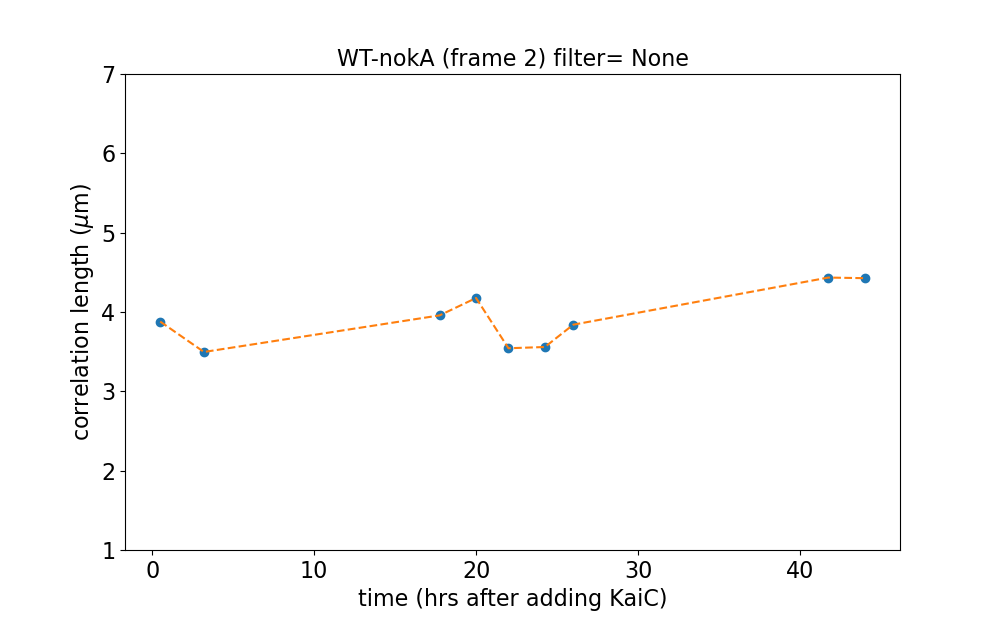

[0.5, 3.2, 17.75, 20, 22, 24.25, 26, 41.75, 44]


In [70]:
###set figure parameters 
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

###label each point 
print(time_array)
    
plt.plot(time_array, corr_length_array,'o')
plt.plot(time_array, corr_length_array,'--')
plt.xlabel("time (hrs after adding KaiC)",fontsize=font_size)
plt.ylabel("correlation length ($\mu$m)",fontsize=font_size)
plt.ylim(1,7)
#title = frame_names[key] + ' (' + frame_num + ')'
plt.title(title, fontsize=font_size)

###save figure 
fig.savefig(plot_saveto+"correlation length vs time for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


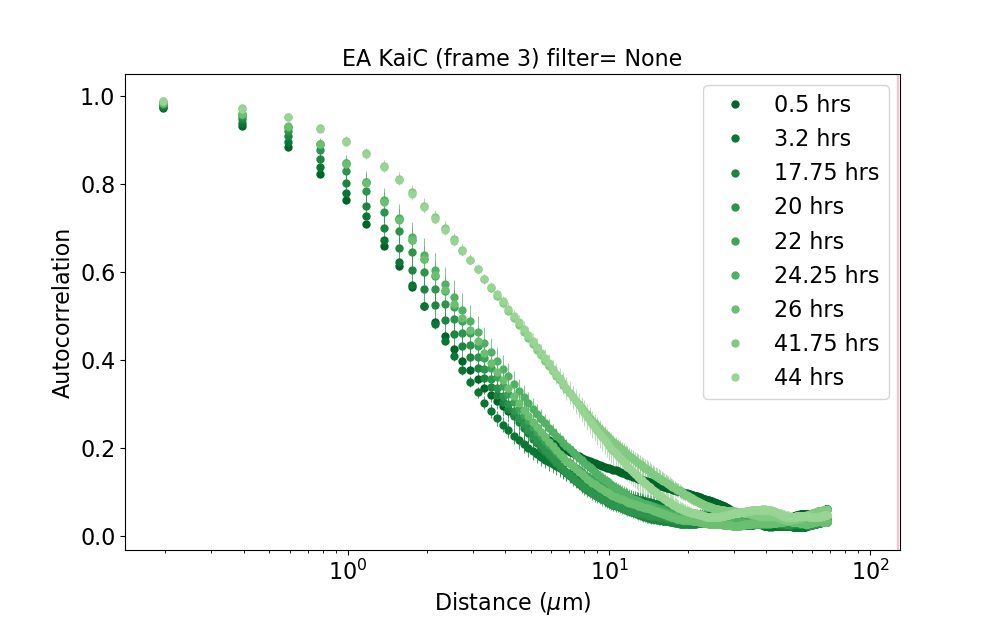

Text(0.5, 1.0, 'EA KaiC (frame 3) filter= None')

In [71]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Greens')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

key = 2
mean_corr_rad_array  = [0.0] * int(len(files))
std_error_array = [0.0] * int(len(files))

for i in range(arr_length):    
    frame_num = "frame %i" % int(key +1) 
    full_filename = files[i]
    data_file = str(time_array[i]) + " hrs" #"time "+(full_filename.split('\\')[-1])[12:-4]
    br_corr_im_array[i], br_corr_rad_array[i] = im_corr(tiff_file.imread(files[i],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    mr_corr_im_array[i], mr_corr_rad_array[i] = im_corr(tiff_file.imread(files[i+arr_length],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    tr_corr_im_array[i], tr_corr_rad_array[i] = im_corr(tiff_file.imread(files[i+(arr_length*2)],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    
    all_ims = np.zeros((3,len(br_corr_rad_array[i])))
    all_ims[0] = br_corr_rad_array[i]
    all_ims[1] = mr_corr_rad_array[i]
    all_ims[2] = tr_corr_rad_array[i]
    
    mean_corr_rad_array[i] = all_ims.mean(axis=0)
    std_error_array[i] = (all_ims.std(axis=0))/np.sqrt(3)
    
    xvalues = np.arange(len(br_corr_rad_array[0]))*0.196
    all_xvalues = xvalues

    plt.semilogx(xvalues, mean_corr_rad_array[i],'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=data_file)
    
    ax.errorbar(xvalues, mean_corr_rad_array[i], std_error_array[i], fmt = 'none', elinewidth=0.5, c=cmap(0.9-(i/cmap_num)))
    ax.set_xscale("log")
    
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
ax.legend(loc=0, fontsize=font_size)
    #####
plt.axvline(x=127.4, color='pink', linestyle='-', label='ROI size')
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 130) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
    #####
plt.title(title, fontsize=font_size)
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [72]:
###save figure 
fig.savefig(plot_saveto+"SIA with error for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


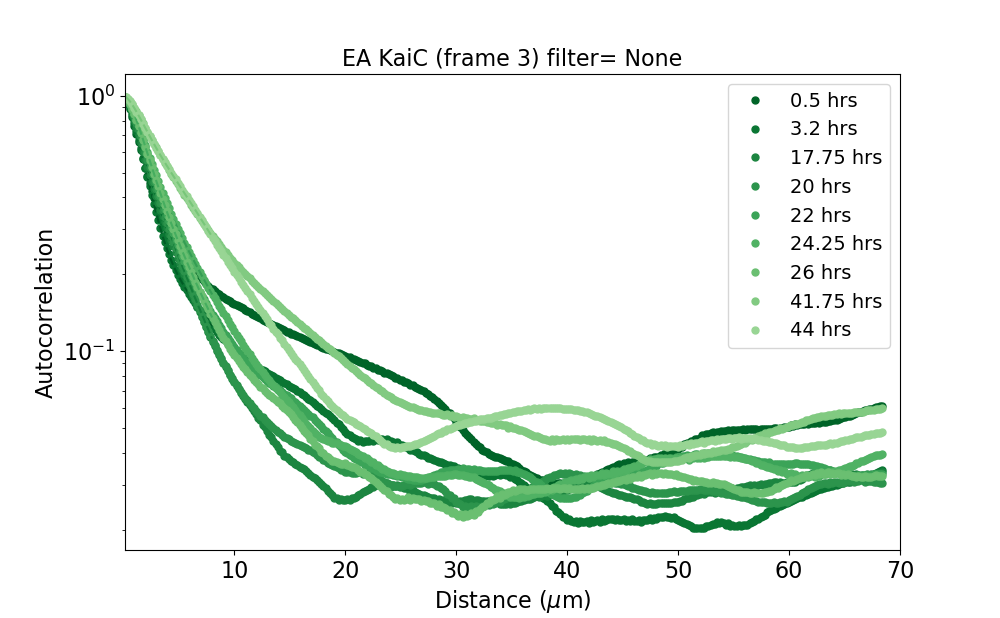

In [73]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Greens')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

frame3_results_dict = {}
frame3_results_dict["time array"] = time_array
corr_length_array = [0.0] * arr_length

for i in range(arr_length):     
    full_filename = files[i]
    time = str(time_array[i]) + " hrs" #"time "+(full_filename.split('\\')[-1])[12:-4]
    y_array =  mean_corr_rad_array[i]
    plt.semilogy(all_xvalues,y_array,'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=time)
    
    ###this section does an 18 degree polynomial fit of the SIA data (corr_rad_array) for each frame
    fit_lim = -50 #set to -1 to fit over whole range of SIA, adjust as needed (maybe avoid fitting noisy data at edge of range)
    fit_line = np.poly1d(np.polyfit(all_xvalues[:fit_lim], y_array[:fit_lim], 17))
    x_fit_values = np.linspace(0.19, 8, 1000)
    a = fit_line(x_fit_values)
    plt.semilogy(x_fit_values, a,'--',c=cmap(0.99-(i/cmap_num)))
    
    ### find the x-value corresponding to the fit line y-value nearest to 1/e
    nearest = find_nearest(a, one_over_e)
    index, = np.where(a == nearest)
    corr_length = float(x_fit_values[index])
    
    ###saving all data & results to results dictionary 
    frame3_results_dict[time] = {} #creates sub dictionary (within results_dict) for each frame analyzed 
    frame3_results_dict[time]["x vals"] = all_xvalues
    frame3_results_dict[time]["y vals"] = y_array
    frame3_results_dict[time]["y error"] = std_error_array[i]
    frame3_results_dict[time]["x fit vals"] = x_fit_values
    frame3_results_dict[time]["y fit vals"] = a
    frame3_results_dict[time]["corr length"] = corr_length
    corr_length_array[i] = corr_length
    
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
#plt.axhline(y=one_over_e, color='r', linestyle='-', label='1/e')
    #####
ax.legend(loc=0,fontsize=(font_size-2))
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 70) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
plt.title(title, fontsize=font_size)
    #####

###save dictionary results 
file_to_write = open(plot_saveto+ "SIA results for "+title+".p", "wb")
pickle.dump(frame3_results_dict, file_to_write)

In [74]:
###save figure 
fig.savefig(plot_saveto+"SIA fits for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


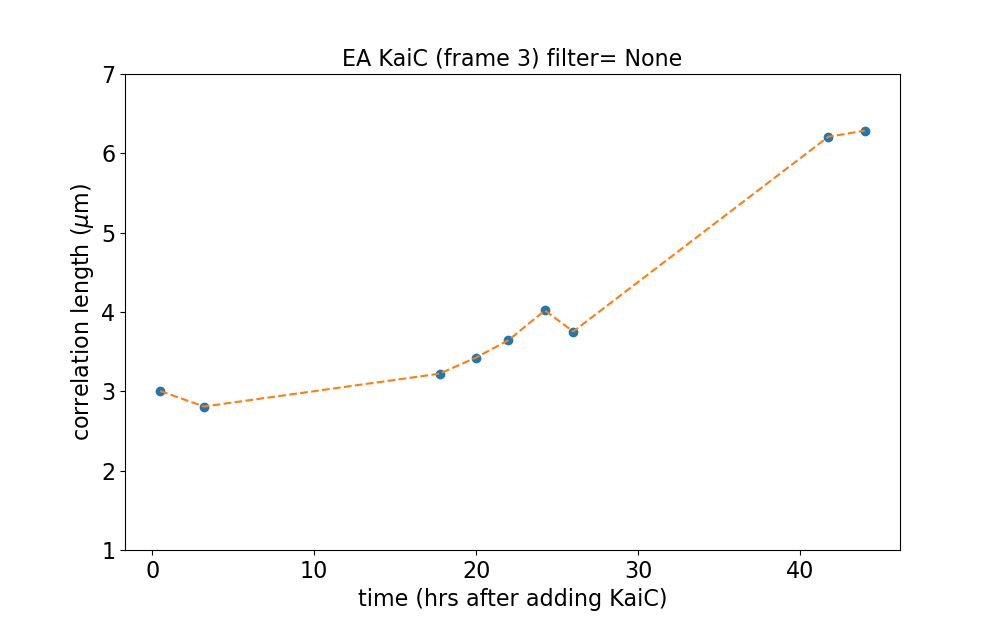

[0.5, 3.2, 17.75, 20, 22, 24.25, 26, 41.75, 44]


In [75]:
###set figure parameters 
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

###label each point 
print(time_array)
    
plt.plot(time_array, corr_length_array,'o')
plt.plot(time_array, corr_length_array,'--')
plt.xlabel("time (hrs after adding KaiC)",fontsize=font_size)
plt.ylabel("correlation length ($\mu$m)",fontsize=font_size)
#title = frame_names[key] + ' (' + frame_num + ')'
plt.ylim(1,7)
plt.title(title, fontsize=font_size)

###save figure 
fig.savefig(plot_saveto+"correlation length vs time for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


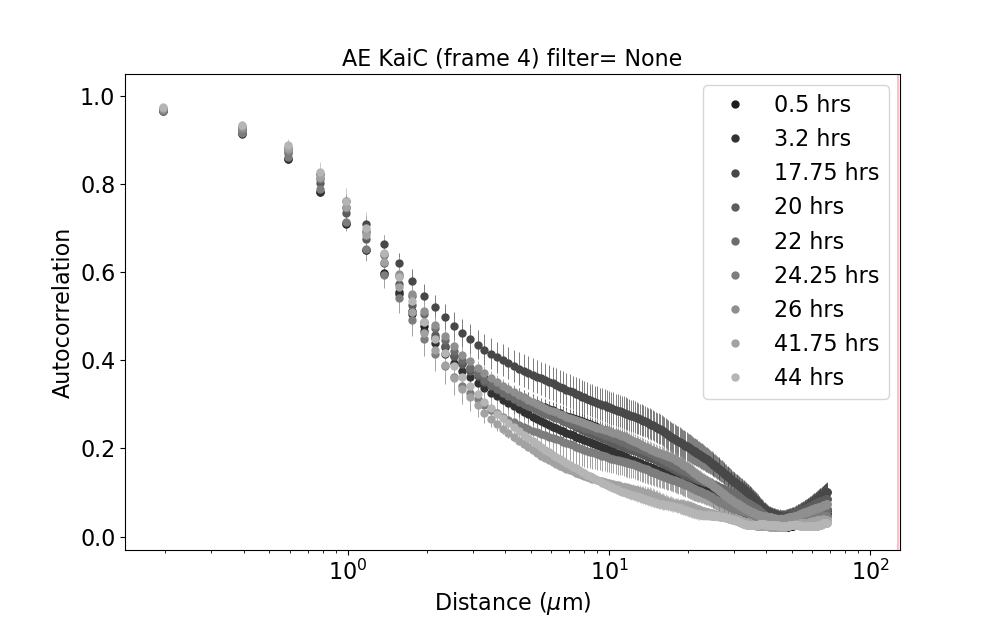

Text(0.5, 1.0, 'AE KaiC (frame 4) filter= None')

In [76]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Greys')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

key = 3
mean_corr_rad_array  = [0.0] * int(len(files))
std_error_array = [0.0] * int(len(files))

for i in range(arr_length):    
    frame_num = "frame %i" % int(key +1) 
    full_filename = files[i]
    data_file = str(time_array[i]) + " hrs" #"time "+(full_filename.split('\\')[-1])[12:-4]
    br_corr_im_array[i], br_corr_rad_array[i] = im_corr(tiff_file.imread(files[i],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    mr_corr_im_array[i], mr_corr_rad_array[i] = im_corr(tiff_file.imread(files[i+arr_length],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    tr_corr_im_array[i], tr_corr_rad_array[i] = im_corr(tiff_file.imread(files[i+(arr_length*2)],key=[key]),filter=t_f,filtersize=size, bin=True, binsize=2)
    
    all_ims = np.zeros((3,len(br_corr_rad_array[i])))
    all_ims[0] = br_corr_rad_array[i]
    all_ims[1] = mr_corr_rad_array[i]
    all_ims[2] = tr_corr_rad_array[i]
    
    mean_corr_rad_array[i] = all_ims.mean(axis=0)
    std_error_array[i] = (all_ims.std(axis=0))/np.sqrt(3)
    
    xvalues = np.arange(len(br_corr_rad_array[0]))*0.196
    all_xvalues = xvalues

    plt.semilogx(xvalues, mean_corr_rad_array[i],'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=data_file)
    
    ax.errorbar(xvalues, mean_corr_rad_array[i], std_error_array[i], fmt = 'none', elinewidth=0.5, c=cmap(0.9-(i/cmap_num)))
    ax.set_xscale("log")
    
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
ax.legend(loc=0, fontsize=font_size)
    #####
plt.axvline(x=127.4, color='pink', linestyle='-', label='ROI size')
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 130) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
    #####
plt.title(title, fontsize=font_size)
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [77]:
###save figure 
fig.savefig(plot_saveto+"SIA with error for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


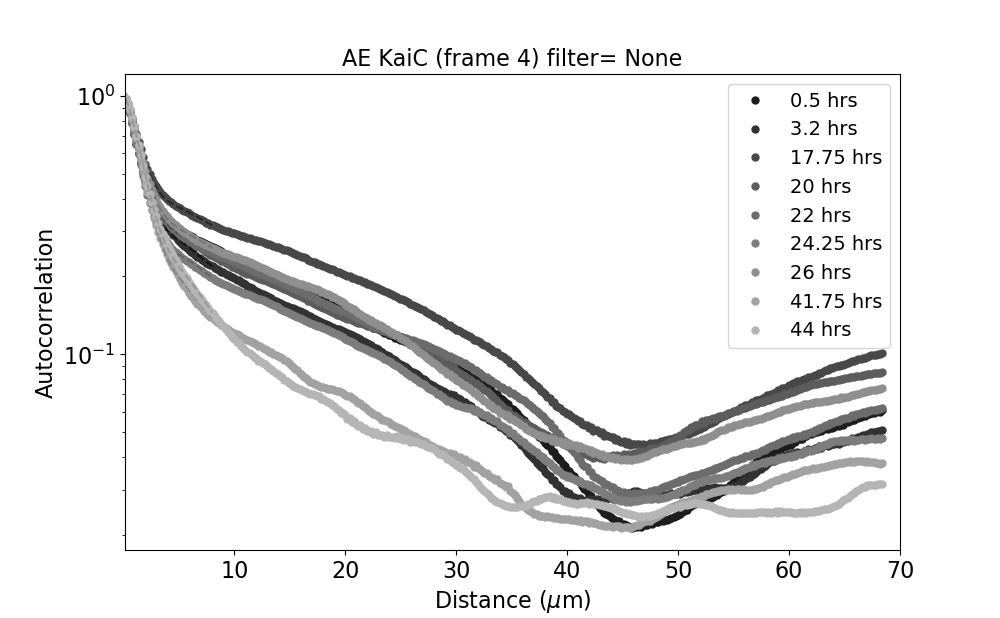

In [78]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Greys')
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

frame4_results_dict = {}
frame4_results_dict["time array"] = time_array
corr_length_array = [0.0] * arr_length

for i in range(arr_length):     
    full_filename = files[i]
    time = str(time_array[i]) + " hrs" #"time "+(full_filename.split('\\')[-1])[12:-4]
    y_array =  mean_corr_rad_array[i]
    plt.semilogy(all_xvalues,y_array,'.',ms=markerSize,c=cmap(0.9-(i/cmap_num)),label=time)
    
    ###this section does an 18 degree polynomial fit of the SIA data (corr_rad_array) for each frame
    fit_lim = -50 #set to -1 to fit over whole range of SIA, adjust as needed (maybe avoid fitting noisy data at edge of range)
    fit_line = np.poly1d(np.polyfit(all_xvalues[:fit_lim], y_array[:fit_lim], 17))
    x_fit_values = np.linspace(0.19, 8, 1000)
    a = fit_line(x_fit_values)
    plt.semilogy(x_fit_values, a,'--',c=cmap(0.99-(i/cmap_num)))
    
    ### find the x-value corresponding to the fit line y-value nearest to 1/e
    nearest = find_nearest(a, one_over_e)
    index, = np.where(a == nearest)
    corr_length = float(x_fit_values[index])
    
    ###saving all data & results to results dictionary 
    frame4_results_dict[time] = {} #creates sub dictionary (within results_dict) for each frame analyzed 
    frame4_results_dict[time]["x vals"] = all_xvalues
    frame4_results_dict[time]["y vals"] = y_array
    frame4_results_dict[time]["y error"] = std_error_array[i]
    frame4_results_dict[time]["x fit vals"] = x_fit_values
    frame4_results_dict[time]["y fit vals"] = a
    frame4_results_dict[time]["corr length"] = corr_length
    corr_length_array[i] = corr_length
    
plt.xlabel("Distance ($\mu$m)",fontsize=font_size)
plt.ylabel("Autocorrelation",fontsize=font_size)
#plt.axhline(y=one_over_e, color='r', linestyle='-', label='1/e')
    #####
ax.legend(loc=0,fontsize=(font_size-2))
#plt.ylim(0.01, 1.1)
plt.xlim(0.14, 70) ## (0.091 um/px) * (1400 px) = 127.4 um --> =size of image x-axis in microns
if size == 0:
    fsize = "None"
else:
    fsize = str(size)
title = frame_names[key] + ' (' + frame_num + ') filter= ' + fsize
plt.title(title, fontsize=font_size)
    #####

###save dictionary results 
file_to_write = open(plot_saveto+ "SIA results for "+title+".p", "wb")
pickle.dump(frame4_results_dict, file_to_write)

In [79]:
###save figure 
fig.savefig(plot_saveto+"SIA fits for "+title+".jpg", dpi=dpi_num)

<IPython.core.display.Javascript object>


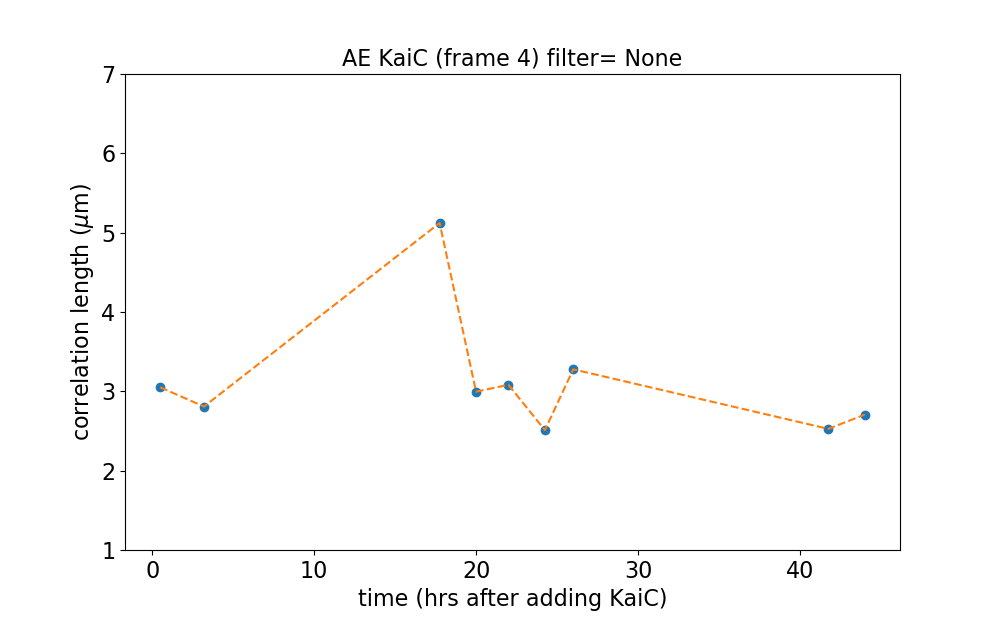

[0.5, 3.2, 17.75, 20, 22, 24.25, 26, 41.75, 44]


In [80]:
###set figure parameters 
fig, ax = plt.subplots(figsize=(fig_size))
ax.tick_params(axis='both', which='major', labelsize=font_size)
markerSize = 10

###label each point 
print(time_array)
    
plt.plot(time_array, corr_length_array,'o')
plt.plot(time_array, corr_length_array,'--')
plt.xlabel("time (hrs after adding KaiC)",fontsize=font_size)
plt.ylabel("correlation length ($\mu$m)",fontsize=font_size)
plt.ylim(1,7)
#title = frame_names[key] + ' (' + frame_num + ')'
plt.title(title,fontsize=font_size)

###save figure 
fig.savefig(plot_saveto+"correlation length vs time for "+title+".jpg", dpi=dpi_num)